# ISYE 6414 - HW 5 #
## Manvitha Kalicheti ##
### gtID: 903838438 ###

In [2]:
data = read.csv('HW5ShipmentData.csv')

<b> Q1 <b/>

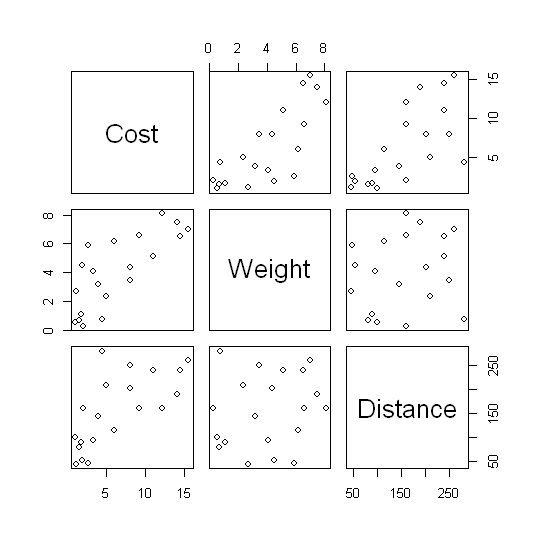

In [3]:
options(repr.plot.width = 4.5, repr.plot.height = 4.5)
plot(data)

It looks like Cost and Weight, and Cost and Distance have a vaguely linear trend. No visible trend between Weight and Distance.

<b> Q2 <b/>

In [4]:
Cost = data[,1]
Weight = data[,2]
Distance = data[,3]

In [5]:
model = lm(Cost ~ Weight + Distance, data = data)

In [6]:
summary(model)


Call:
lm(formula = Cost ~ Weight + Distance, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.239 -1.101 -0.129  1.283  2.313 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.672757   0.891147  -5.244 6.60e-05 ***
Weight       1.292414   0.137842   9.376 3.95e-08 ***
Distance     0.036936   0.004602   8.026 3.49e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.493 on 17 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.9063 
F-statistic: 92.89 on 2 and 17 DF,  p-value: 7.066e-10


First order model: $y = \beta_{0} + \beta_{1}x_{1}+\beta_{2}x_{2}+\epsilon$

From the model summary, we get 

$\beta_{0} = -4.673, \beta_{1} = \beta_{Weight} = 1.292, \beta_{2} = \beta_{Distance} = 0.037$

In [7]:
modelaov = aov(Cost ~ ., data=data)

In [8]:
summary(modelaov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Weight       1  270.6  270.55  121.35 3.68e-09 ***
Distance     1  143.6  143.63   64.42 3.49e-07 ***
Residuals   17   37.9    2.23                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

From linear model, $F_0 = 92.89$

From table, $F_{\alpha, k-1,N-k-1} = F_{0.05, 1, 17}=4.451$

As $F_{0} >> F_{\alpha, k-1,N-k-1}$, the model as a whole is significant. 

The p-values for all 3 $\beta$s is $<<\alpha = 0.05 \implies$ all $\beta$s are significant. 

<b> Q3 <b/>

From ANOVA

$R^2 = SSR/SST = (270.6+143.6)/(270.6+143.6+37.9) = 414.2/452.1 = 0.91616$

In [9]:
summary(model)$r.squared #from linear model

[1] 0.9161639

$R^2$ from our calculation using ANOVA table quantities matches the $R^2$ from model summary.

<b> Q4 <b/> 

In [24]:
res = resid(model)
mean(res)

[1] 3.611477e-17

Expectation (or in this case, mean) of the residuals is nearly zero. 

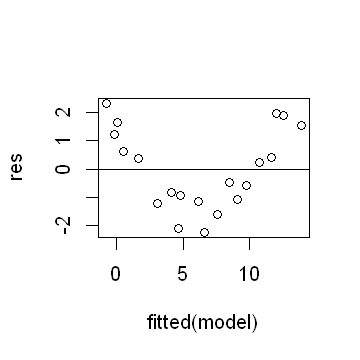

In [37]:
options(repr.plot.width = 3, repr.plot.height = 3)
plot(fitted(model), res)
abline(0,0)

The residuals follow a 'V' like trend $\implies$ they are not of constant variance. 

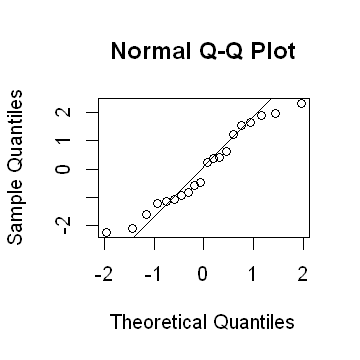

In [26]:
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(res)
qqline(res)

Residuals stray away from the straight line towards the ends $\implies$ they are not normally distributed.

<b> Q5 <b/>

In [27]:
new = data.frame(Weight = 6, Distance = 150)
predict.lm(model, new, interval = "confidence", level = 0.95)

fit,lwr,upr
8.622054,7.710552,9.533557


We can say with $95\%$ confidence that the estimated value of the cost of shipment lies between $\$7.711$ and $\$9.534$ for package weight of $6$ pounds and when distance shipped is $150$ miles.

<b> Q6 <b/>

In [28]:
predict.lm(model, new, interval = "prediction", level = 0.95)

fit,lwr,upr
8.622054,5.34258,11.90153


We can say with $95\%$ confidence that the predicted value of the cost of shipment lies between $\$5.343$ and $\$11.9015$ for package weight of $6$ pounds and when distance shipped is $150$ miles.

<b> Q7 <b/>

In [29]:
fullmodel = lm(Cost ~ polym(Weight, Distance, degree = 2))

In [30]:
anova(model, fullmodel)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,37.901092,NA,NA,NA,NA
14,2.744738,3,35.15635,59.77363,3.176466e-08


$H_{0}:$ All coefficients missing in the reduced model are $0$.

$H_{a}:$ Atleast one of the coefficients missing in the reduced model is non zero. 

From the ANOVA table, the F-statistic is $59.7763$ and the p-value is nearly $0$.

From the tables, $F_{0.05,17,14} = 2.4282 << F-statistic$. 

Clearly, $H_{0}$ can be rejected $\implies$ the full model is better than the reduced model.

In [31]:
data1 = read.csv('HW5StateCostData.csv')
COST = data1[,1]
STATE = data1[,2]

<b> Q8 <b/>

In [32]:
model1 = lm(COST ~ STATE, data = data1)

In [33]:
summary(model1)


Call:
lm(formula = COST ~ STATE, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.80  -95.83  -37.90  153.32  295.20 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     279.60      53.43   5.233 1.63e-05 ***
STATEKentucky    80.30      75.56   1.063   0.2973    
STATETexas      198.20      75.56   2.623   0.0141 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 168.9 on 27 degrees of freedom
Multiple R-squared:  0.205,	Adjusted R-squared:  0.1462 
F-statistic: 3.482 on 2 and 27 DF,  p-value: 0.04515


The base level is the state of Kansas. With p-value of 0.04515 < $\alpha = 0.05$, this linear regression model with qualitative variable 'State' is significant. 

In [34]:
aovcat = aov(COST ~ STATE, data = data1)
summary(aovcat)

            Df Sum Sq Mean Sq F value Pr(>F)  
STATE        2 198772   99386   3.482 0.0452 *
Residuals   27 770671   28543                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$H_{0}:$ STATE is significant.

$H_{a}:$ STATE is not significant.

From the ANOVA table, the F-statistic is $3.482$ and the p-value is nearly $0.0452 < \alpha = 0.5$.

From the tables, $F_{0.05,2, 27} = 3.354 < F-statistic$. 

$H_{0}$ can be rejected $\implies$ the qualitative variable State with three categories is significant.

<b> Q9 <b/>

In [35]:
contrasts(COST)

,Kentucky,Texas
Kansas,0,0
Kentucky,1,0
Texas,0,1


The above table shows the dummy variables used in the model and their values for the states. 

Model: $y = \beta_{0} + \beta_{Kentucky} + \beta_{Texas} + \epsilon$

$y = 279.60 + 80.30 x_{1} + 198.20x_{2} + \epsilon$ where $x_{1}$ and $x_{2}$ are described by the columns Kentucky and Texas in the table above. 

$\beta_{0} = 279.60$ corresponds to mean annual maintenance costs accrued by the system users in Kansas.

<b> Q10 <b/>

From the model summary in Q8, with $p-value = 0.0141 < \alpha = 0.05$, we see that there is a significant difference in the mean annual maintenance costs accrued by the system users in Kansas and Texas. With $p-value = 0.2973 > \alpha = 0.05$, we see that there isn't a significant difference in the mean annual maintenance costs accrued by the system users in Kansas and Kentucky. This is further validated by the tukey table below.

In [36]:
TukeyHSD(aovcat)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = COST ~ STATE, data = data1)

$STATE
                 diff       lwr      upr     p adj
Kentucky-Kansas  80.3 -107.0343 267.6343 0.5447834
Texas-Kansas    198.2   10.8657 385.5343 0.0365147
Texas-Kentucky  117.9  -69.4343 305.2343 0.2797413


With an adjusted $p-value = 0.0365 < \alpha = 0.05$, we see that the difference between expected costs in Texas and Kansas is significant, while the difference between Kentucky and Texas or Kentucky and Kansas is not significant.